<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula04b_pseudo_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [93]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(data['data'], data['target'], random_state=42)
print(Xtr.shape, Xte.shape, ytr.shape, yte.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


In [94]:
Xtr2 = Xtr[:, 2:3]
Xtr2.shape

(15480, 1)

[1.66372304 0.07480793]
1.1408323852823978


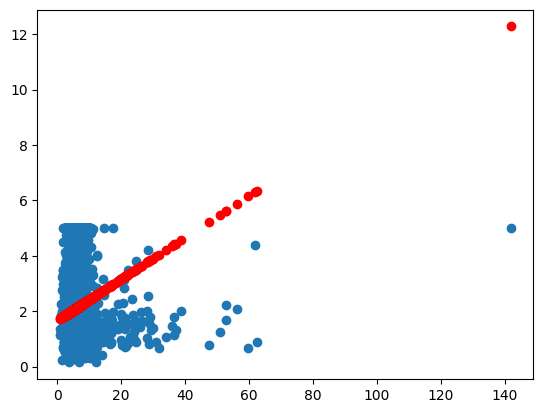

In [99]:
import numpy as np
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

def include_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.concatenate((bias, X), axis=1)

class LinearRegression:
    def fit(self, X, y):
        X = include_bias(X)
        self.w = np.linalg.pinv(X) @ y
        print(self.w)
        return self

    def predict(self, X):
        X = include_bias(X)
        return X @ self.w

model = LinearRegression()
model.fit(Xtr2, ytr)
ypred = model.predict(Xtr2)
print(root_mean_squared_error(ytr, ypred))
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()

In [100]:
model = LinearRegression()
model.fit(Xtr, ytr)
ypred = model.predict(Xtr)
print(root_mean_squared_error(ytr, ypred))

[-3.70278276e+01  4.47600069e-01  9.56752596e-03 -1.24755956e-01
  7.94471254e-01 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01
 -4.33405135e-01]
0.7214930466501481


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtr)
Xtr_norm = scaler.transform(Xtr)
Xte_norm = scaler.transform(Xte)

model = LinearRegression()
model.fit(Xtr_norm, ytr)
ypred = model.predict(Xtr_norm)
print(root_mean_squared_error(ytr, ypred))

[ 2.07034892e+00  8.52108147e-01  1.20655325e-01 -3.02105554e-01
  3.48605752e-01 -1.64465406e-03 -4.11635631e-02 -8.93146971e-01
 -8.67840463e-01]
0.7214930466501481
